Epoch 1/50
64/64 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7972 - val_loss: 0.3583 - val_accuracy: 0.8605
Epoch 2/50
64/64 [==============================] - 0s 743us/step - loss: 0.3078 - accuracy: 0.8853 - val_loss: 0.2896 - val_accuracy: 0.9136
Epoch 3/50
64/64 [==============================] - 0s 758us/step - loss: 0.2530 - accuracy: 0.9060 - val_loss: 0.2668 - val_accuracy: 0.9077
Epoch 4/50
64/64 [==============================] - 0s 756us/step - loss: 0.2286 - accuracy: 0.9149 - val_loss: 0.2649 - val_accuracy: 0.9096
Epoch 5/50
64/64 [==============================] - 0s 745us/step - loss: 0.2131 - accuracy: 0.9222 - val_loss: 0.2612 - val_accuracy: 0.9077
Epoch 6/50
64/64 [==============================] - 0s 716us/step - loss: 0.2014 - accuracy: 0.9262 - val_loss: 0.2605 - val_accuracy: 0.9018
Epoch 7/50
64/64 [==============================] - 0s 709us/step - loss: 0.1947 - accuracy: 0.9316 - val_loss: 0.2599 - val_accuracy: 0.9096
Epoch 8/

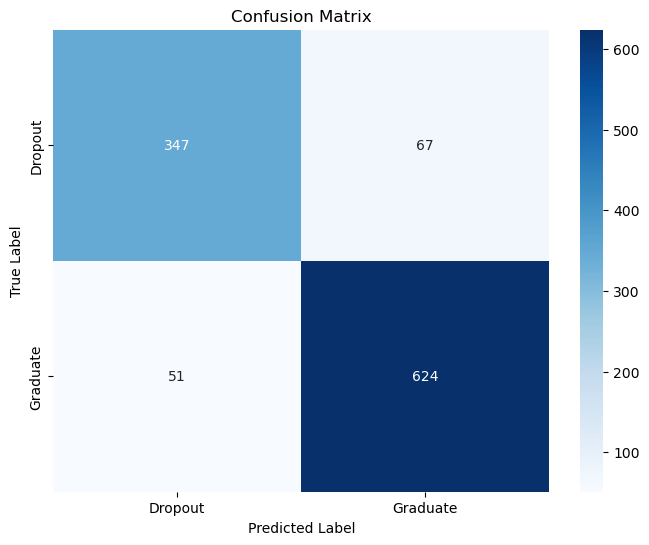

F1-Score: 0.91


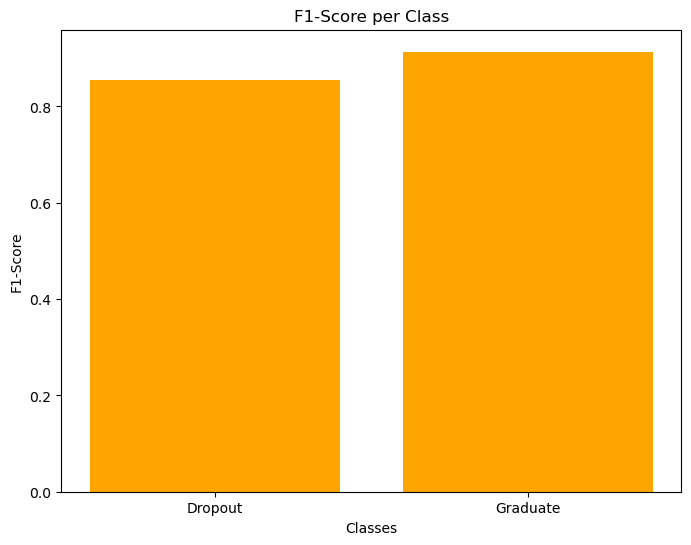

INFO:tensorflow:Assets written to: /var/folders/ws/60zc0ycd1p73wjpc889xjcl80000gn/T/tmpvjfgogzb/assets


INFO:tensorflow:Assets written to: /var/folders/ws/60zc0ycd1p73wjpc889xjcl80000gn/T/tmpvjfgogzb/assets


Model has been saved as 'student_classification_model.h5' and converted to 'student_classification_model.tflite'


2024-11-13 21:08:24.195291: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-11-13 21:08:24.195304: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-11-13 21:08:24.195423: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/ws/60zc0ycd1p73wjpc889xjcl80000gn/T/tmpvjfgogzb
2024-11-13 21:08:24.196124: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-11-13 21:08:24.196129: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/ws/60zc0ycd1p73wjpc889xjcl80000gn/T/tmpvjfgogzb
2024-11-13 21:08:24.199039: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-11-13 21:08:24.230453: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /var/folders/ws/60zc0ycd1p73wjpc889xjcl80000gn/T/tmpvjfgogzb
2024-11-

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/Users/shreyasr/Documents/Projects/Iot_Project/CP-3_Project/test.csv')

# Encode the target variable (convert 'Graduate'/'Dropout' to 1/0)
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),   # First hidden layer
    Dense(32, activation='relu'),                                    # Second hidden layer
    Dense(1, activation='sigmoid')                                   # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# F1-Score visualization (for both classes)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")

# Plot the F1-Score for the two classes
f1_scores = [f1_score(y_test, y_pred, pos_label=0), f1_score(y_test, y_pred, pos_label=1)]
classes = label_encoder.classes_

plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores, color='orange')
plt.title("F1-Score per Class")
plt.ylabel("F1-Score")
plt.xlabel("Classes")
plt.show()

# Save the trained model as a .h5 file
model.save('student_classification_model.h5')

# Convert the .h5 model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('student_classification_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been saved as 'student_classification_model.h5' and converted to 'student_classification_model.tflite'")


In [3]:
!pip install seaborn

In [7]:
interpreter = tf.lite.Interpreter(model_path="/Users/shreyasr/Documents/Projects/Iot_Project/CP-3_Project/student_classification_model.tflite")
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
VERBOSE: Replacing 4 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 1 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.


In [8]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('input_details:\n', input_details)
print('output_details:\n', output_details)

input_details:
 [{'name': 'serving_default_dense_6_input:0', 'index': 0, 'shape': array([ 1, 34], dtype=int32), 'shape_signature': array([-1, 34], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 10, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [9]:

input_shape = input_details[0]['shape']
input_data = np.random.random_sample(input_shape)
print(input_data)
input_data = np.array(input_data, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.37478372 0.48700925 0.21850294 0.74456009 0.73374087 0.6445911
  0.82650902 0.98138443 0.33329533 0.13252349 0.18074818 0.61664602
  0.32942468 0.28030244 0.20589298 0.2911471  0.93164077 0.74159322
  0.13409714 0.52035497 0.90629113 0.36312211 0.6602414  0.01629143
  0.35249996 0.94344319 0.21013633 0.16853142 0.12005974 0.49155332
  0.31458121 0.42918321 0.50344148 0.24328057]]
[[0.6663018]]


In [10]:

output_data = model.predict(input_data)
print(output_data)

1/1 [==============================] - 0s 9ms/step
[[0.6663017]]


In [ ]:
import time

def hex_to_c_array(hex_data, var_name="student_model_data"):
    """Convert hex data to a C array representation."""

    c_str = '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    c_str += '/* Generated from TensorFlow Lite model */\n'
    
    localtime = time.asctime(time.localtime(time.time()))
    c_str += f"// Generated on {localtime}\n\n"
    
 
    c_str += f"const unsigned int {var_name}_len = {len(hex_data)};\n"
    c_str += f"const unsigned char {var_name}[] = {{\n"
    
  
    hex_lines = []
    for i, val in enumerate(hex_data):
        hex_str = f'0x{val:02x}'
        if i < len(hex_data) - 1:
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n'
        hex_lines.append(hex_str)
    c_str += '\n'.join(hex_lines) + '\n};\n\n'
    
    # Close header guard
    c_str += '#endif // ' + var_name.upper() + '_H\n'
    
    return c_str


In [12]:

with open("student_classification_model.tflite", "rb") as f:
    hex_data = f.read()
    

c_code = hex_to_c_array(hex_data, "student_model")
print("Generated C array code:")
print(c_code[:500])  


Generated C array code:
#ifndef STUDENT_MODEL_H
#define STUDENT_MODEL_H

/* Generated from TensorFlow Lite model */
// Generated on Wed Nov 13 10:26:47 2024

const unsigned int student_model_len = 19504;
const unsigned char student_model[] = {
0x1c,
0x00,
0x00,
0x00,
0x54,
0x46,
0x4c,
0x33,
0x14,
0x00,
0x20,
0x00,

0x1c,
0x00,
0x18,
0x00,
0x14,
0x00,
0x10,
0x00,
0x0c,
0x00,
0x00,
0x00,

0x08,
0x00,
0x04,
0x00,
0x14,
0x00,
0x00,
0x00,
0x1c,
0x00,
0x00,
0x00,

0x88,
0x00,
0x00,
0x00,
0xe0,
0x00,
0x00,
0x00,
0x00,
0x46,
0


In [13]:
# Write the C array to a header file
with open("student_model_data101.h", "w") as f:
    f.write(c_code)

print("C array written to 'student_model_data101.h'")

C array written to 'student_model_data101.h'
